# Ensemble Methods Using Grid Search and Cross Validation

## Context
This datasets is related to red variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

Dataset:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality

Problem Statement:

Wine Quality Prediction- Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository. The wine dataset is a classic and very easy multi-class classification dataset.

## Error

Error = Error(Bias) + Error(Variance) + Irreducible Error

Therefore, any ML model can never achieve the accuracy of 1.

## Best Models

1. Random Forest 0.6583

2. Adaboost with Parameter Tuning on Random Forest - 0.6541


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
wine = pd.read_csv("~/Downloads/winequality-red.csv", sep=";")

In [9]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Dealing here would entail conversion of all the classes in two classes like 0 and 1. 

Assumption: Any Wine which has quality parameter of > than 6 is 1 and else 0

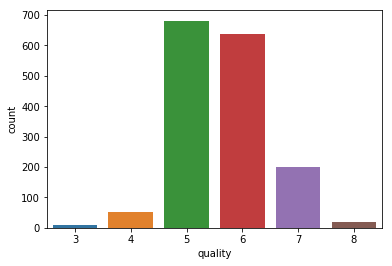

In [13]:
# Plot the Quality to see how the quality appears
sns.countplot(wine.quality)

In [14]:
wine.shape

(1599, 12)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


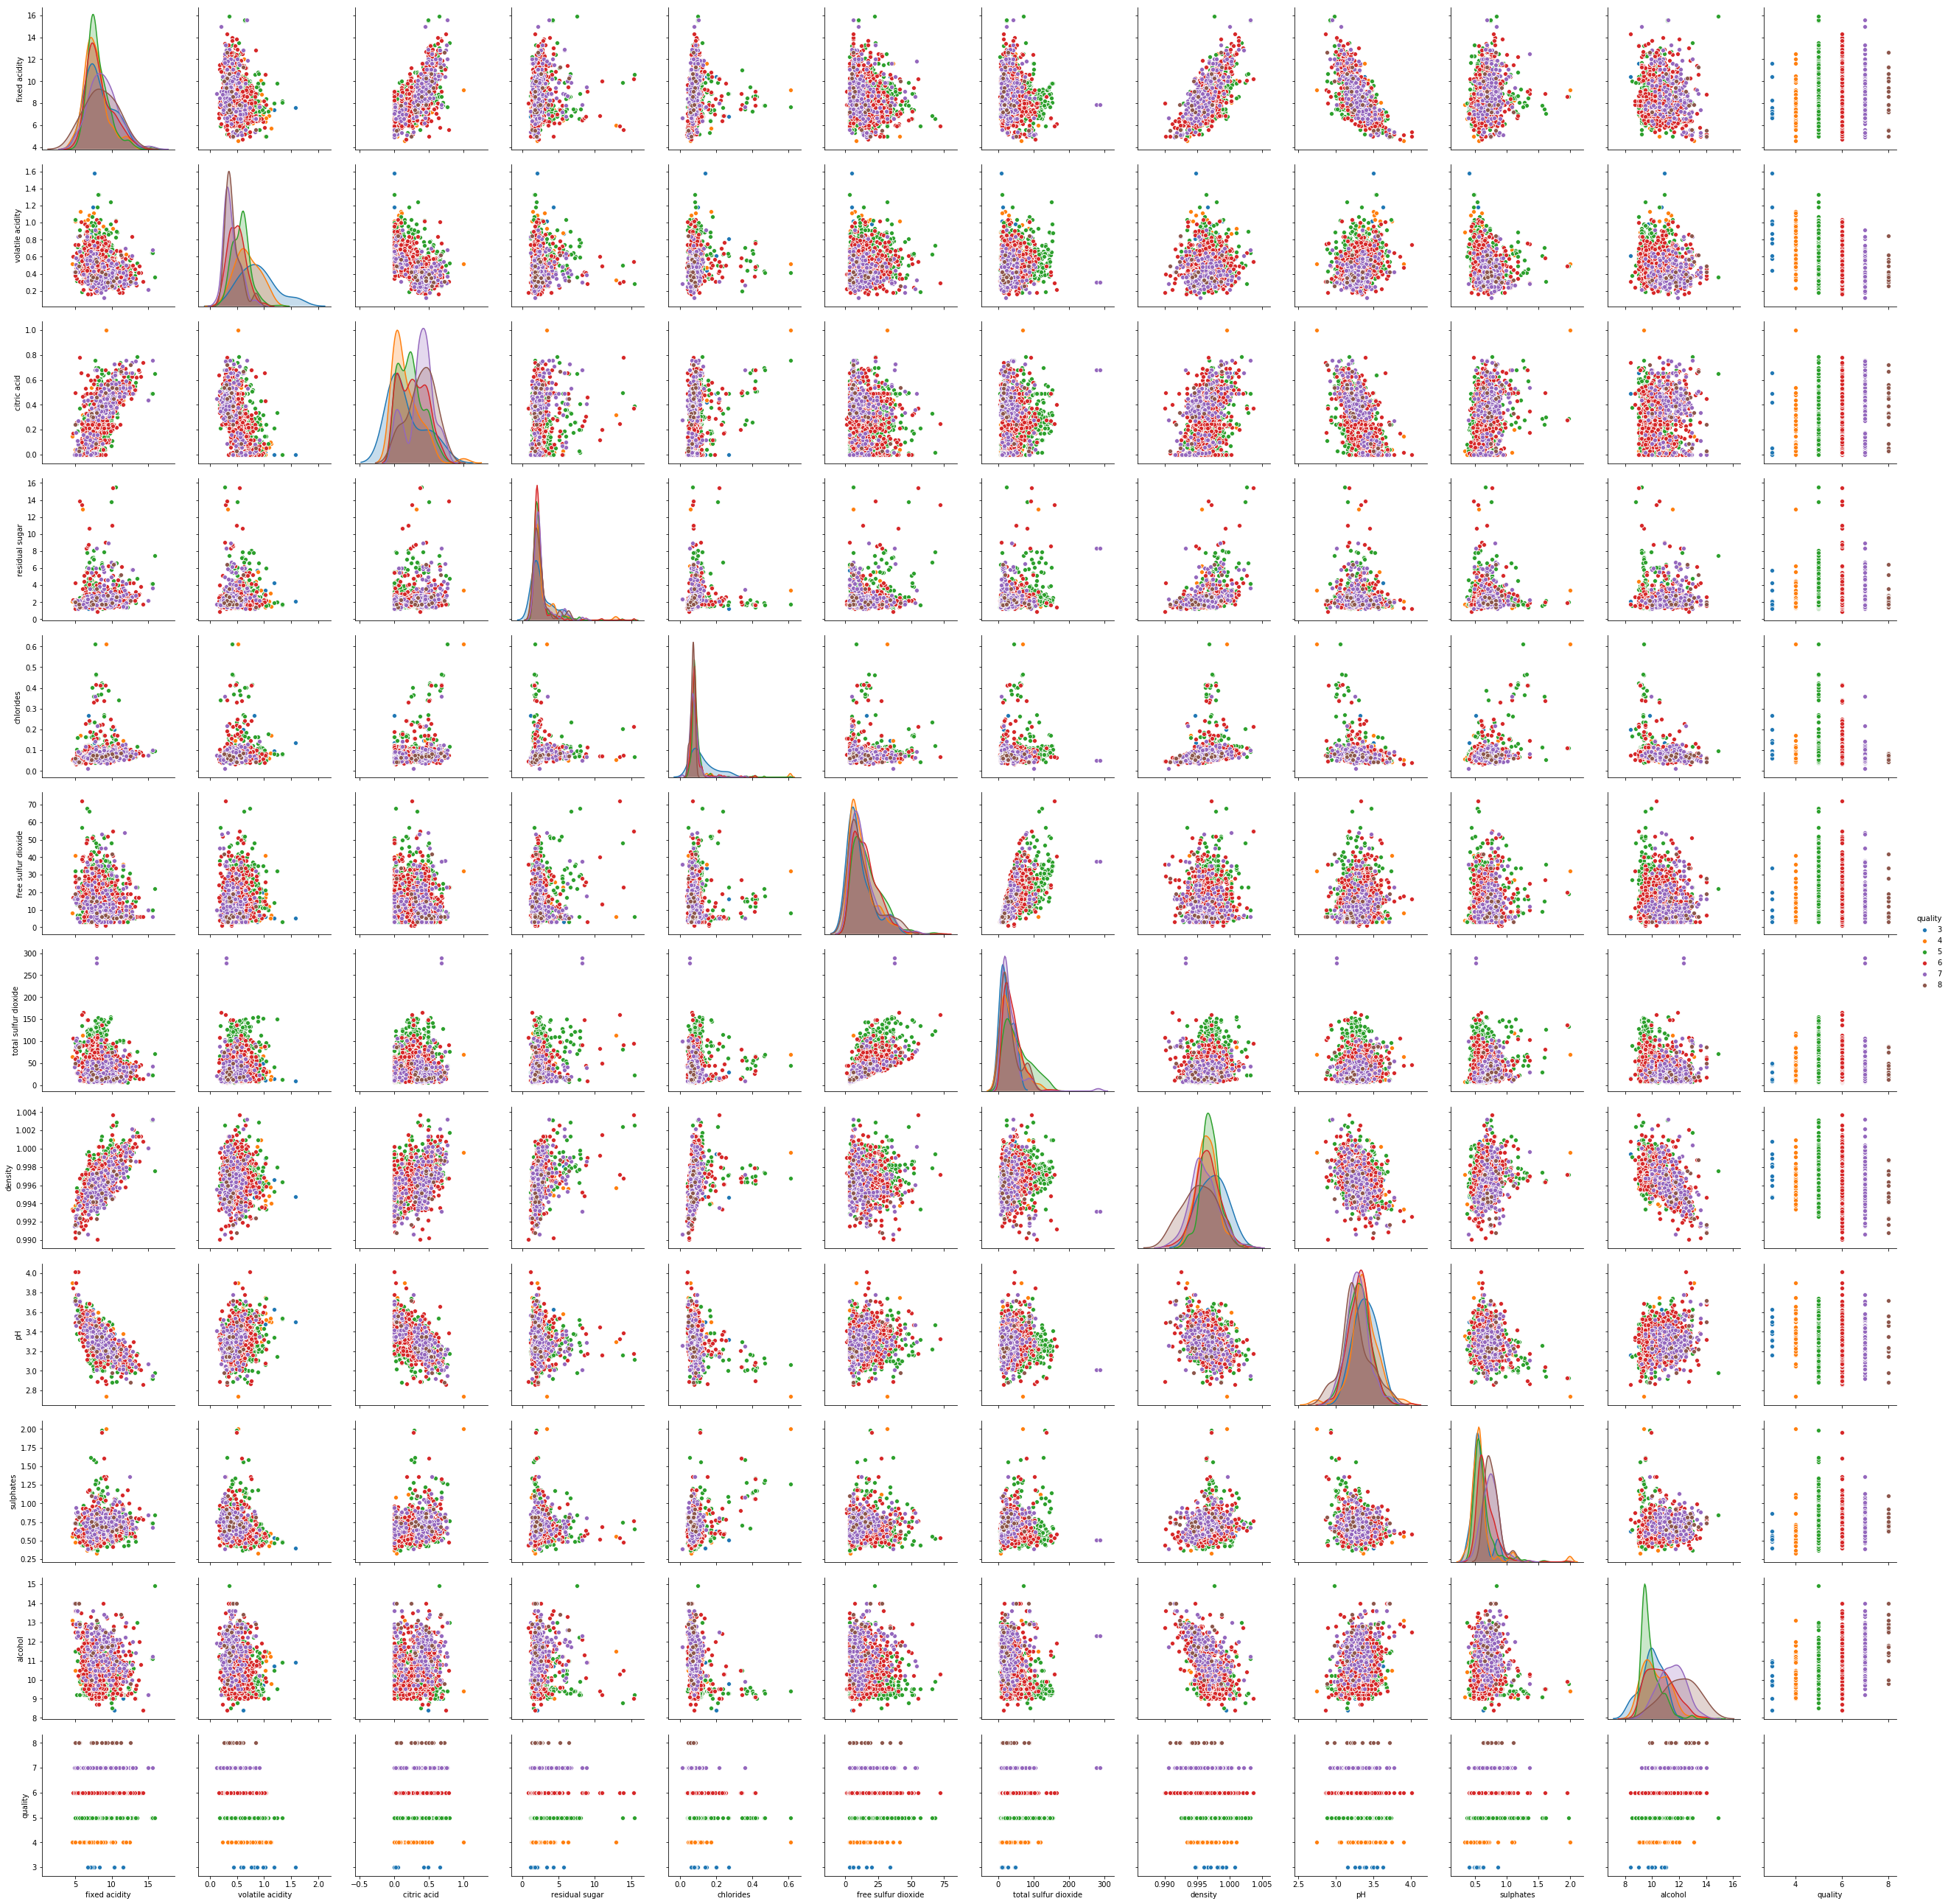

In [15]:
sns.pairplot(wine, hue = "quality", size = 3)

In [16]:
# Split the Data in train and test
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier

In [19]:
# Scaling the Data as the data has different levels of measurements
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
# Scaling the Data and converting it back into DF
newwine = pd.DataFrame(sc.fit_transform(wine.drop("quality", axis = 1)))

In [33]:
# Assigning the Column Names
newwine.columns =wine.columns[0:11] 

In [37]:
# Defining the X and Ys and splitting the Data in Train and Test
x = newwine
y = wine.quality
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.30, random_state = 123)

In [79]:
# Apply Decision tree Model
dtree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
# Fitting the Model
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
# Predict the Values from Model
model_tree = dtree.predict(xtest)

In [42]:
# Import Accuracy and Kappa
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score

In [82]:
print(accuracy_score(ytest, model_tree))
print(cohen_kappa_score(ytest, model_tree))

0.5791666666666667
0.3542500549446891


In [83]:
print(classification_report(ytest, model_tree))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.19      0.15        16
           5       0.71      0.63      0.67       214
           6       0.58      0.59      0.59       185
           7       0.44      0.53      0.48        58
           8       0.00      0.00      0.00         5

   micro avg       0.58      0.58      0.58       480
   macro avg       0.31      0.32      0.31       480
weighted avg       0.60      0.58      0.59       480



In [84]:
# Apply Cross Validation on the Data itself

from sklearn.model_selection import cross_val_score
print(cross_val_score(estimator=dtree, X = wine.drop("quality", axis = 1), y = y, cv = 5))
print(cross_val_score(estimator=dtree, X = wine.drop("quality", axis = 1), y = y, cv = 5).mean())

[0.51552795 0.47040498 0.43925234 0.46855346 0.4384858 ]
0.4684258227499266


In [168]:
# Random Forest
rf = RandomForestClassifier()

In [169]:
rf.fit(xtrain,ytrain)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [170]:
model_rf = rf.predict(xtest)

In [171]:
print(accuracy_score(ytest, model_rf))
print(cohen_kappa_score(ytest, model_rf))

0.6583333333333333
0.4538983967977579


In [93]:
# Finding the Cross Validation Score on CV as 5
print(cross_val_score(estimator = rf, X = x, y = y, cv = 5))
cross_val_score(estimator = rf, X = x, y = y, cv = 5).mean()

[0.50931677 0.51401869 0.52024922 0.55974843 0.55205047]


0.5341446643253841

### The Random Forest Base Model's accuracy is 0.6416. Lets Apply Grid Search to see if this can improve...

In [157]:
# Applying Grid Search and Cross Validation where the CV = 5

# Mention the Parameters
tree_params = {"criterion":['gini', "entropy"], 
            "max_features":["auto", "sqrt", "log2"], 
            "min_samples_leaf":[1,5,10,20],
            "min_samples_split":[2,10, 25, 50]}

In [158]:
# Import Grid Search
from sklearn.model_selection import GridSearchCV

In [172]:
grid_tree = GridSearchCV(estimator=dtree, param_grid=tree_params, cv = 5)

In [173]:
grid_tree.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 5, 10, 20], 'min_samples_split': [2, 10, 25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [174]:
# Get the Best Parameters from the Grid Search
print(grid_tree.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 20, 'min_samples_split': 25}


In [175]:
# Redefining the Random Forest with the Newly Found Parameters after Fitting the Dataset
rf = RandomForestClassifier(criterion= 'gini', max_features= 'auto', min_samples_leaf= 20, min_samples_split= 25)

In [176]:
rf.fit(xtrain, ytrain)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [177]:
model_rf = rf.predict(xtest)

In [178]:
print(accuracy_score(ytest, model_rf))
print(cohen_kappa_score(ytest, model_rf))

0.5708333333333333
0.28809532380575265


In [94]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [95]:
print(cross_val_score(estimator = lg, X = x, y = y, cv = 5))
cross_val_score(estimator = lg, X = x, y = y, cv = 5).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

[0.53726708 0.52647975 0.63239875 0.58805031 0.61198738]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.5792366563174234

In [109]:
# Voting Classifier Model
vott = VotingClassifier(estimators=[("LG", lg), ("RF", rf), ("ADA", ada)])

In [110]:
vott.fit(xtrain,ytrain)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier(estimators=[('LG', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('RF', RandomFo...m='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [111]:
model_vott = vott.predict(xtest)

In [112]:
print(accuracy_score(ytest, model_vott))
print(cohen_kappa_score(ytest, model_vott))

0.5875
0.3060747663551403


In [113]:
print(cross_val_score(estimator = vott, X = x, y = y, cv = 5))
cross_val_score(estimator = vott, X = x, y = y, cv = 5).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

[0.51863354 0.56697819 0.62928349 0.56918239 0.59621451]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

0.5673315680825295

In [105]:
# Adaboost BASE Model
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [106]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [107]:
model_ada = ada.predict(xtest)

In [114]:
accuracy_score(model_ada, ytest)

0.5125

### The ADABOOST Base Model gives the Accuracy of 0.5125. Lets Apply Grid Search with Random Forest to Check if the Model can be Improved

In [122]:
# GRID SEARCH With Random Forest
# Define the Parameters for ADABOOST
boostparam = {"base_estimator":[rf],
             "n_estimators":[50,75],
             "learning_rate":[1,2,3,4,5],
             "algorithm":["SAMME", "SAMME.R"],
             "random_state":[0]}

In [123]:
# Apply Grid Search
grid_boost = GridSearchCV(estimator=ada, param_grid=boostparam, cv  = 5)

In [124]:
# Fit the Grid Boost on the Dataset to find the Best Parameters
grid_boost.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator': [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
      ... [50, 75], 'learning_rate': [1, 2, 3, 4, 5], 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [147]:
# Extracting the Best Parameters after Fitting the Grid Search
print(grid_boost.best_params_)

{'algorithm': 'SAMME', 'base_estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'learning_rate': 1, 'n_estimators': 50, 'random_state': 0}


In [141]:
# Defining the Adaboost with the Best Parameters Extracted
ada = AdaBoostClassifier(algorithm='SAMME',
                         base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),learning_rate= 1,n_estimators= 50,random_state= 0)

In [142]:
# Fitting the Model
ada.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1, n_estimators=50, random_state=0)

In [143]:
# Making Predictions with the Newly Best Parameters Found
model_ada = ada.predict(xtest)

In [144]:
# Checking the Accuracy Score
accuracy_score(ytest,model_ada)

0.6541666666666667